In [1]:
import os
from glob import glob
from tqdm.notebook import tqdm
from dateutil import parser

import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

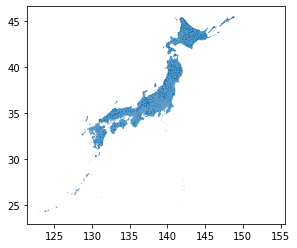

In [2]:
aoi_dir = "../data/aoi"
df_aoi = gpd.read_file(glob(os.path.join(aoi_dir, "*.shp"))[0])
df_aoi.plot()
plt.show()

In [3]:
data_paths = glob("../data/google_drive/*.csv")
for cnt, data_path in enumerate(data_paths):
    df_tmp = pd.read_csv(data_path).loc[5:]
    date = data_path.split("_")[-1].split(".")[0]
    if cnt==0:
        df = pd.DataFrame({date:df_tmp["mean"]})
        df.index = df_tmp["JCODE"].astype(int)
        df = df.T
    else:
        tmp = pd.DataFrame({date:df_tmp["mean"]})
        tmp.index = df_tmp["JCODE"].astype(int)
        tmp = tmp.T
        df = pd.concat([df, tmp])
    #break
df.index = [parser.parse(l) for l in df.index]
df = df.sort_index()
df.to_csv("../data/night_light.csv")